# Basic Statistics in Python

In [1]:
from IPython.display import VimeoVideo
# Tutorial Video Name: Data Science Software
VimeoVideo('637657244', width=720, height=480)

https://vimeo.com/637657244

- [pandas](https://pandas.pydata.org/)
- [numpy](https://numpy.org/)
- [scipy](https://www.scipy.org/)
- [matplotlib](https://matplotlib.org/)
- [seaborn](https://seaborn.pydata.org/)

# Import Packages

In [2]:
# if you get error ensure you "pip install each-module" in the terminal or command prompt

# import pandas
import pandas as pd
from pandas import DataFrame

# import numpy
import numpy as np

#import scipy
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind

#import matplotlib
import matplotlib.pyplot as plt

#import seaborn
import seaborn as sns

# Load in data

In [3]:
olympicEvents = pd.read_csv('../../Data/olympicEvents.csv')
olympicEvents.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Notice the NaNs in the above dataset

### Data Wrangling Remove the NaNs

In [4]:
# use dropna to remove the NaNs
olympicEvents.dropna(inplace=True)
olympicEvents.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


# Single Sample t-test

*Is the average age different from 22?*

## Test Assumptions - Normally Distributed

<AxesSubplot:>

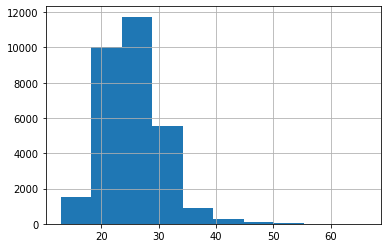

In [5]:
olympicEvents['Age'].hist()

*Looks relatively normal, move on*

## Run the Analysis

In [6]:
# use ttest_1samp for a single sample t-test
# tstat = stats.ttest_1samp(olympicEvents['Age'], 22)
tstat, p_val = stats.ttest_1samp(olympicEvents['Age'], 22)

In [7]:
print(f"The tstat is: {tstat}, p_val is: {p_val}")

The tstat is: 117.96999514411488, p_val is: 0.0


*Yes, the average age is different than 22. But is it higher or lower? lets check!*

In [8]:
olympicEvents.Age.mean()

25.42901162983334

# Independent t-test

*Does the average age differ between men and women?*

## Test Assumptions - Normal Distribution

<AxesSubplot:>

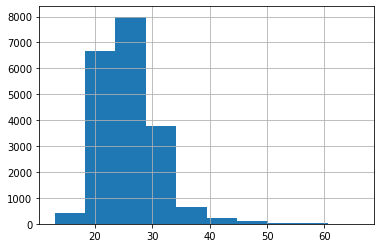

In [9]:
olympicEvents.Age[olympicEvents.Sex == 'M'].hist()

<AxesSubplot:>

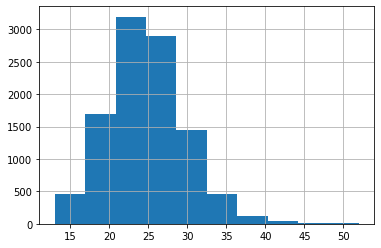

In [10]:
olympicEvents.Age[olympicEvents.Sex == 'F'].hist()

*Yes, both approximately normal*

## Run the Analysis

In [11]:
#run an independent t-test
# ttest_ind(olympicEvents.Age[olympicEvents.Sex == 'M'], olympicEvents.Age[olympicEvents.Sex == 'F'])
tstat1, p_val1 = ttest_ind(olympicEvents.Age[olympicEvents.Sex == 'M'], olympicEvents.Age[olympicEvents.Sex == 'F'])

In [12]:
print(f"The tstat is: {tstat1}, p_val is: {p_val1}")

The tstat is: 20.811905071131516, p_val is: 1.5853311644818236e-95


*Yes, their average ages are different. How different?*

In [13]:
olympicEvents.groupby('Sex')['Age'].mean()

Sex
F    24.597585
M    25.862942
Name: Age, dtype: float64

# Dependent t-test

# Next Question: Does age differ by year?

<AxesSubplot:>

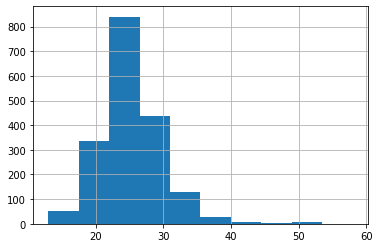

In [14]:
olympicEvents.Age[olympicEvents.Year == 1992].hist()

<AxesSubplot:>

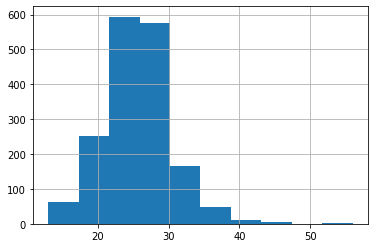

In [15]:
olympicEvents.Age[olympicEvents.Year == 1996].hist()

In [16]:
olympicEvents1 = pd.melt(olympicEvents, id_vars=['Sport', 'Year'], value_vars=['Age'])

In [17]:
olympicEvents1.head()

,Sport,Year,variable,value
0,Ice Hockey,2014,Age,28.0
1,Gymnastics,1948,Age,28.0
2,Gymnastics,1948,Age,28.0
3,Gymnastics,1948,Age,28.0
4,Gymnastics,1948,Age,28.0


In [18]:
years = [1992, 1996]
olympicEvents2 = olympicEvents1[olympicEvents1.Year.isin(years)]

In [19]:
olympicEvents2.head(20)

,Sport,Year,variable,value
6,Alpine Skiing,1992,Age,20.0
7,Alpine Skiing,1992,Age,20.0
14,Rowing,1996,Age,26.0
15,Football,1996,Age,23.0
25,Water Polo,1996,Age,22.0
31,Fencing,1992,Age,30.0
33,Rowing,1996,Age,29.0
37,Rowing,1992,Age,30.0
40,Rowing,1992,Age,33.0
51,Wrestling,1996,Age,25.0


In [20]:
olympicEvents3 = olympicEvents2.groupby(['Sport', 'Year'])['value'].mean()

In [21]:
olympicEvents3.head()

Sport          Year
Alpine Skiing  1992    23.866667
Archery        1992    24.210526
               1996    24.450000
Athletics      1992    25.797753
               1996    26.566667
Name: value, dtype: float64

In [22]:
olympicEvents4 = olympicEvents3.unstack()

In [23]:
olympicEvents4.head()

Year,1992,1996
Sport,,
Alpine Skiing,23.866667,NaN
Archery,24.210526,24.450000
Athletics,25.797753,26.566667
Badminton,25.117647,24.666667
Baseball,25.466667,24.200000


In [24]:
olympicEvents4.dropna(inplace=True)

In [31]:
# This chart looks at the average age per grouped by sport for both 1992 and 1996
olympicEvents4.head()

Year,1992,1996
Sport,,
Archery,24.210526,24.450000
Athletics,25.797753,26.566667
Badminton,25.117647,24.666667
Baseball,25.466667,24.200000
Basketball,26.220588,26.830986


## Run the Analysis

In [26]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
# Calculate the t-test on TWO RELATED samples of scores, a and b.
tstat2, p_val2 = stats.ttest_rel(olympicEvents4[1992], olympicEvents4[1996])
print(f"The tstat is: {tstat2}, p_val is: {p_val2}")

The tstat is: -2.2822883154932674, p_val is: 0.030271538873384646


# Independent Chi-Square

*Does the season influence the types of medals given out?*

In [27]:
# https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
# Compute a simple cross tabulation of two (or more) factors.
crosstab = pd.crosstab(olympicEvents['Season'], olympicEvents['Medal'])

In [54]:
crosstab

Medal,Bronze,Gold,Silver
Season,,,
Summer,8566,8542,8233
Winter,1582,1625,1633


## Chi-square test of independence of variables in a contingency table.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

```text
Returns:

chi2float
The test statistic.

pfloat
The p-value of the test

dofint
Degrees of freedom

expectedndarray, same shape as observed
The expected frequencies, based on the marginal sums of the table.
```

In [28]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
# Chi-square test of independence of variables in a contingency table.
# here is a two-way example 2x3 with 2 factors summer and winter
stats.chi2_contingency(crosstab)

(3.4745101681496746,
 0.17600285120006448,
 2,
 array([[8520.60793214, 8536.56098207, 8283.83108578],
        [1627.39206786, 1630.43901793, 1582.16891422]]))

*No, there is no influence on season in the distribution of medals given out*

*Does meet the assumption of 5 cases per cell*

# Correlation

In [29]:
olympicEvents['Height'].corr(olympicEvents['Weight'])

0.8018308248560183

<AxesSubplot:>

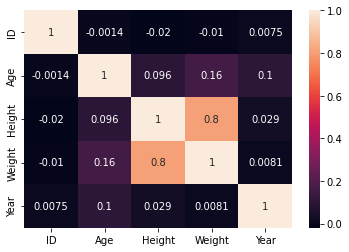

In [30]:
sns.heatmap(olympicEvents.corr(), annot=True)